In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,NaN,0.0,0.0,0.0,0.0,0,0.0,2,0.0
1,1.0,1.0,2.0,NaN,NaN,0.0,3.0,0.0,NaN,NaN,...,0,0.0,0.0,0.0,0.0,2.0,2,2.0,0,7.0
2,2.0,2.0,1.0,0.0,NaN,0.0,3.0,0.0,NaN,0.0,...,0,0.0,0.0,2.0,0.0,NaN,3,2.0,0,NaN
3,2.0,2.0,2.0,NaN,0.0,0.0,NaN,0.0,2.0,NaN,...,0,0.0,0.0,2.0,0.0,2.0,2,2.0,0,7.0
4,2.0,NaN,NaN,NaN,0.0,0.0,2.0,0.0,2.0,0.0,...,0,0.0,NaN,3.0,NaN,2.0,2,2.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,...,0,0.0,0.0,NaN,0.0,0.0,0,3.0,0,NaN
354,2.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,3.0,NaN,...,0,NaN,NaN,0.0,0.0,0.0,0,1.0,0,70.0
355,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0,0.0,NaN,2.0,0.0,0.0,0,2.0,0,70.0
356,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,NaN,0.0,0.0,0.0,0,NaN,0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	71
float64		column 2	71
float64		column 3	70
float64		column 4	70
float64		column 5	106
float64		column 6	71
float64		column 7	70
float64		column 8	35
float64		column 9	71
float64		column 10	141
float64		column 11	106
float64		column 12	106
float64		column 13	70
float64		column 14	105
float64		column 15	35
float64		column 16	35
int64		column 17	0
float64		column 18	105
float64		column 19	141
float64		column 20	71
float64		column 21	35
float64		column 22	71
float64		column 23	71
float64		column 24	106
int64		column 25	0
float64		column 26	105
float64		column 27	105
float64		column 28	36
float64		column 29	106
float64		column 30	71
int64		column 31	0
float64		column 32	70
int64		column 33	0
float64		column 34	71


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,287.000000,287.000000,288.00000,288.000000,252.000000,287.000000,288.000000,323.000000,287.000000,217.000000,...,358.000000,253.000000,253.000000,322.000000,252.000000,287.00000,358.000000,288.000000,358.000000,287.000000
mean,2.073171,1.829268,1.56250,1.409722,0.535714,0.435540,0.184028,0.356037,0.557491,0.336406,...,0.399441,0.308300,0.359684,0.909938,0.301587,0.10453,0.117318,1.927083,0.558659,36.076655
std,0.657031,0.638601,0.84901,1.081444,0.774799,0.950814,0.599787,0.815334,0.947580,0.715058,...,0.856479,0.689929,0.859745,1.119619,0.815877,0.42993,0.493863,0.661191,1.107990,14.638334
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,26.000000
50%,2.000000,2.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.00000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,2.000000,0.000000,47.000000
max,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

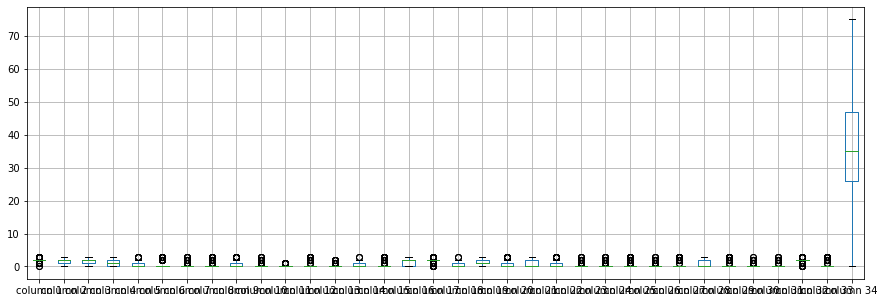

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.073171
column 2      1.829268
column 3      1.562500
column 4      1.409722
column 5      0.535714
column 6      0.435540
column 7      0.184028
column 8      0.356037
column 9      0.557491
column 10     0.336406
column 11     0.123016
column 12     0.297619
column 13     0.138889
column 14     0.501976
column 15     0.315789
column 16     1.371517
column 17     1.955307
column 18     0.505929
column 19     1.271889
column 20     0.567944
column 21     1.003096
column 22     0.522648
column 23     0.257840
column 24     0.313492
column 25     0.399441
column 26     0.308300
column 27     0.359684
column 28     0.909938
column 29     0.301587
column 30     0.104530
column 31     0.117318
column 32     1.927083
column 33     0.558659
column 34    36.076655
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.408611,0.233302,-0.126849,-0.063716,0.082777,-0.156991,0.051625,0.233515,0.229765,...,0.054277,0.132192,0.063710,0.062678,0.017504,0.025568,0.002252,0.096408,0.066345,0.033035
column 2,0.408611,1.000000,0.263647,-0.124835,-0.068997,-0.022931,-0.140698,-0.134574,0.288707,0.172937,...,-0.124619,0.216917,-0.112510,0.049510,-0.176477,-0.042330,-0.010972,-0.003181,-0.143450,0.055477
column 3,0.233302,0.263647,1.000000,-0.113201,0.198294,0.280735,-0.181844,0.213979,0.235256,0.156856,...,0.238363,0.292960,0.264078,-0.267445,0.194690,-0.079771,-0.118113,0.086523,0.213762,0.201045
column 4,-0.126849,-0.124835,-0.113201,1.000000,0.057513,0.419147,-0.121558,0.363686,-0.381995,-0.298052,...,0.383704,-0.210580,0.359302,0.013141,0.359360,-0.117573,-0.172040,0.148677,0.393123,0.038755
column 5,-0.063716,-0.068997,0.198294,0.057513,1.000000,0.378723,-0.149873,0.361008,-0.106250,-0.080463,...,0.382213,0.005003,0.439385,0.000445,0.252636,-0.141486,-0.153503,0.166513,0.359219,0.105327
column 6,0.082777,-0.022931,0.280735,0.419147,0.378723,1.000000,-0.140290,0.900223,-0.298252,-0.198124,...,0.896030,-0.066671,0.914599,0.098988,0.918232,-0.115608,-0.122778,0.241288,0.924876,0.124743
column 7,-0.156991,-0.140698,-0.181844,-0.121558,-0.149873,-0.140290,1.000000,-0.129978,0.148462,-0.070864,...,-0.117107,-0.136631,-0.109983,0.003579,-0.119323,0.748784,0.825958,-0.106983,-0.133722,-0.387555
column 8,0.051625,-0.134574,0.213979,0.363686,0.361008,0.900223,-0.129978,1.000000,-0.257848,-0.232654,...,0.878109,-0.088272,0.885370,0.157931,0.889394,-0.072325,-0.105551,0.273661,0.882288,0.131736
column 9,0.233515,0.288707,0.235256,-0.381995,-0.106250,-0.298252,0.148462,-0.257848,1.000000,0.549356,...,-0.280409,0.361821,-0.251917,-0.362928,-0.241222,0.230423,0.238195,-0.110272,-0.277029,-0.049162
column 10,0.229765,0.172937,0.156856,-0.298052,-0.080463,-0.198124,-0.070864,-0.232654,0.549356,1.000000,...,-0.218585,0.440640,-0.200232,-0.332928,-0.174946,-0.050938,-0.046851,-0.016922,-0.233755,-0.017960


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+34,34+34+34,34+34+34+34,34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34,34+34+34+34,34+34+34,34+34,34], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 59.712444652210586
Epoch: 1 , loss: 59.011845501986414
Epoch: 2 , loss: 59.62922737815163
Epoch: 3 , loss: 59.39035016840155
Epoch: 4 , loss: 59.42112315784801
Epoch: 5 , loss: 58.94798434864391
Epoch: 6 , loss: 58.37836889787154
Epoch: 7 , loss: 56.38424006375399
Epoch: 8 , loss: 55.35758798772638
Epoch: 9 , loss: 54.381416667591445
Epoch: 10 , loss: 53.98305528814142
Epoch: 11 , loss: 53.71152617714622
Epoch: 12 , loss: 53.306004610928625
Epoch: 13 , loss: 52.86055495522239
Epoch: 14 , loss: 52.835404656150125
Epoch: 15 , loss: 52.14950440146706
Epoch: 16 , loss: 51.98412253639915
Epoch: 17 , loss: 52.084639289162375
Epoch: 18 , loss: 51.71284380826083
Epoch: 19 , loss: 51.54972822015936
Epoch: 20 , loss: 51.49607328935103
Epoch: 21 , loss: 51.120553276755594
Epoch: 22 , loss: 50.76864953474565
Epoch: 23 , loss: 50.80974145369096
Epoch: 24 , loss: 50.77224627408114
Epoch: 25 , loss: 50.53494696183638

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.938092
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     0.282974
column 11     0.000000
column 12     0.000000
column 13     0.094011
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.668697
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     2.307183
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.000000,-0.257699,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-1.954278,...,0,0.070674,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
1,0.0,0.000000,0.000000,2.232488,0.653450,0.0,0.000000,0.000000,-2.509493,0.131067,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
2,0.0,0.000000,0.000000,0.000000,0.632877,0.0,0.000000,0.000000,-1.132811,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,-3.164098,0,0.000000,0,50.824337
3,0.0,0.000000,0.000000,-0.162440,0.000000,0.0,-1.897979,0.000000,0.000000,-1.849929,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
4,0.0,-0.648973,0.201172,1.137076,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.340970,0.000000,0.126501,0.000000,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.047747,...,0,0.000000,0.000000,-2.339911,0.000000,0.000000,0,0.000000,0,-51.495872
354,0.0,0.000000,0.000000,0.842782,0.287446,0.0,0.000000,0.000000,0.000000,-1.890731,...,0,0.119091,0.259236,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
355,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.346948,0.000000,...,0,0.000000,0.521525,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
356,0.0,0.134870,1.064806,-1.930323,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.399701,0.000000,0.000000,0.000000,0,0.260598,0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(212.21067452942444, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.2799345166625911

In [18]:
new_df.iloc[66,:]

column 1      1.402122
column 2      1.188471
column 3      0.000000
column 4      3.000000
column 5      0.303774
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.045225
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.909141
column 20     0.273020
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.490500
column 29     0.134141
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.000000,0.742301,1.000000,1.000000,0.0,0.000000,0.000000,2.000000,0.045722,...,0,0.070674,0.000000,0.000000,0.000000,0.000000,0,0.000000,2,0.000000
1,1.0,1.000000,2.000000,2.232488,0.653450,0.0,3.000000,0.000000,0.490507,0.131067,...,0,0.000000,0.000000,0.000000,0.000000,2.000000,2,2.000000,0,7.000000
2,2.0,2.000000,1.000000,0.000000,0.632877,0.0,3.000000,0.000000,0.867189,0.000000,...,0,0.000000,0.000000,2.000000,0.000000,-0.164098,3,2.000000,0,57.824337
3,2.0,2.000000,2.000000,0.837560,0.000000,0.0,0.102021,0.000000,2.000000,0.150071,...,0,0.000000,0.000000,2.000000,0.000000,2.000000,2,2.000000,0,7.000000
4,2.0,1.351027,1.201172,1.137076,0.000000,0.0,2.000000,0.000000,2.000000,0.000000,...,0,0.000000,0.340970,3.000000,0.126501,2.000000,2,2.000000,0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.000000,0.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.047747,...,0,0.000000,0.000000,0.660089,0.000000,0.000000,0,3.000000,0,18.504128
354,2.0,3.000000,2.000000,0.842782,0.287446,0.0,0.000000,0.000000,3.000000,0.109269,...,0,0.119091,0.259236,0.000000,0.000000,0.000000,0,1.000000,0,70.000000
355,2.0,2.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.346948,0.000000,...,0,0.000000,0.521525,2.000000,0.000000,0.000000,0,2.000000,0,70.000000
356,2.0,1.134870,1.064806,1.069677,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.399701,0.000000,0.000000,0.000000,0,1.260598,0,70.000000


In [20]:
imputations[-1].to_excel("DERM_NG_20(imp).xlsx", index=False, header=False)